In [1]:
from ReebGraph import SequentialReebGraph
import ReebGraph
from tests.simulator import brownian_motion
import numpy as np
import matplotlib.pyplot as plt
import importlib

In [110]:
TRAJECTORY_LENGTH = int(24 * 60 * 60 / 15)

trajectories = np.array(
    [brownian_motion(TRAJECTORY_LENGTH, 2) for i in range(30)]
    # [brownian_motion(30, 1) for i in range(4)]
)

# randomly mask points in each trajectory, replacing them with np.nan with probability p
p = 0.1
masks = np.random.rand(trajectories.shape[0], trajectories.shape[1]) < p
trajectories[masks] = np.nan

(30, 5760, 2)


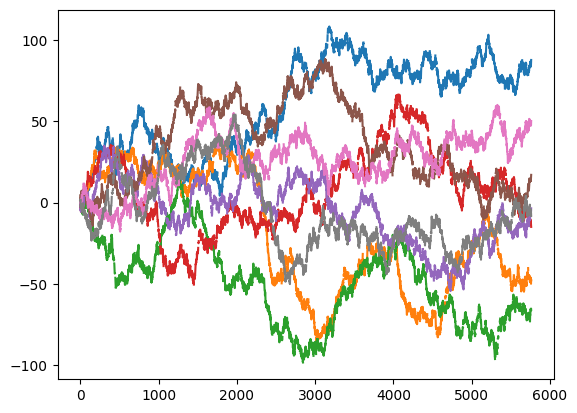

In [111]:
print(trajectories.shape)
for _ in range(4):
    plt.plot(trajectories[_])

importlib.reload(ReebGraph)
reeb = ReebGraph.SequentialReebGraph(epsilon=50, store_trajectories=True, 
                                     trajectory_shape=trajectories[0].shape)

In [112]:
reeb.append_trajectories(trajectories)

In [18]:
importlib.reload(ReebGraph)
# # split the trajectories into N sets
# N = 2
# trajectories_split = np.array_split(trajectories, N)

# reeb_split = []
# for i in range(N):
#     reeb_split.append(ReebGraph.SequentialReebGraph(epsilon=2.5, store_trajectories=True))
#     reeb_split[i].append_trajectories(trajectories_split[i], compute_graph=False)

# reeb1 = reeb_split[0]
# reeb2 = reeb_split[1]

# # reeb_merge = reeb1.union(reeb2, adjust_epsilon=1)
# reeb_merge = reeb1.copy()

reeb_combined = ReebGraph.SequentialReebGraph(epsilon=2, store_trajectories=True)
reeb_combined.append_trajectories(trajectories)

for node in reeb_combined.nodes:
    print(node)

(0, np.float64(-1.769568861970014))
(0, np.float64(-0.8549642246280668))
(0, np.float64(-0.5872749147707155))


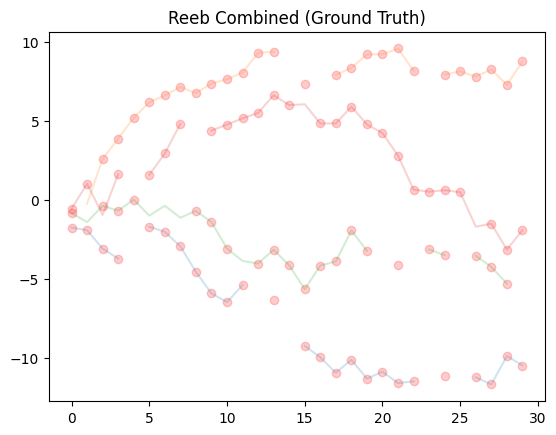

In [12]:
def plot_reeb(reeb):
    for edge in reeb.edges:
        dx = edge[1][0] - edge[0][0]
        dy = edge[1][1] - edge[0][1]
        plt.arrow(edge[0][0], edge[0][1], dx, dy, 
                head_width=0.5, head_length=0.6, fc='b', ec='b', 
                length_includes_head=True, alpha=0.6)

    for node in reeb.nodes:
        plt.scatter(node[0], node[1], c='r')
        
    for trajectory in reeb.trajectories:
        plt.plot(trajectory, alpha=0.2)

def plot_bundles(reeb):
    for trajectory in reeb.trajectories:
        plt.plot(trajectory, alpha=0.2)

    for t in range(len(reeb.bundles)):
        for bcenter in reeb.bundles[t].centers:
            plt.scatter(t, bcenter, c='r', alpha=0.2)

# plt.figure()
# plt.title("Reeb")
# # plot_reeb(reeb1)
# plot_bundles(reeb1)

# plt.figure()
# plt.title("Reeb 2")
# # plot_reeb(reeb2)
# plot_bundles(reeb2)

# plt.figure()
# plt.title("Both Reeb Graphs")
# plot_reeb(reeb1)
# plot_reeb(reeb2)


# plt.figure(figsize=(10, 5))
# plt.subplot(1, 2, 1)
# plt.title("Reeb Union")
# plot_reeb(reeb_merge)

# plt.subplot(1, 2, 2)
plt.title("Reeb Combined (Ground Truth)")
plot_bundles(reeb_combined)

In [7]:
AGENT_COUNT = 1
trajectories = np.array(
    # two agents worth of trajectory data
    [brownian_motion(TRAJECTORY_LENGTH, 2) for i in range(AGENT_COUNT * 30)]
)
print(trajectories.shape)

(30, 5760, 2)


In [8]:
# naive method: append all trajectories
reeb_naive = SequentialReebGraph(epsilon=25)
reeb_naive.append_trajectories(trajectories)

print(f"Nodes: {len(reeb_naive.nodes)}, Edges: {len(reeb_naive.edges)}")

Nodes: 13738, Edges: 18078


In [4]:
# split the trajectories into N sets
N = 10
trajectories_split = np.array_split(trajectories, N)

reeb_split = []
for i in range(N):
    reeb_split.append(SequentialReebGraph(epsilon=25))
    reeb_split[i].append_trajectories(trajectories_split[i], compute_graph=False)


In [5]:
reeb_combined = reeb_split[0]

for i in range(1, N - 1):
    reeb_combined = reeb_combined.union(reeb_split[0], compute_graph=False)

reeb_combined = reeb_combined.union(reeb_split[0]) 
print(f"Nodes: {len(reeb_combined.nodes)}, Edges: {len(reeb_combined.edges)}")

Nodes: 235, Edges: 280


In [6]:
plot_reeb(reeb_combined)

NameError: name 'reeb_combined' is not defined

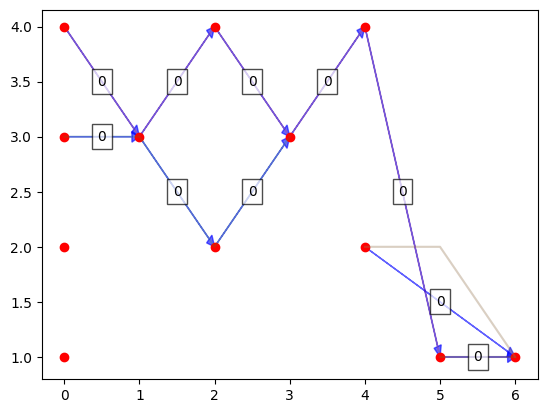

In [ ]:
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt

def plot_reeb(reeb):
    for start, end, weight in reeb.edges.data():
        dx = end[0] - start[0]
        dy = end[1] - start[1]
        plt.arrow(start[0], start[1], dx, dy, 
            head_width=0.1, head_length=0.1, fc='b', ec='b', 
            length_includes_head=True, alpha=0.6)
        # Add weight text near the middle of the arrow
        plt.text(start[0] + dx/2, start[1] + dy/2, 
            f'{weight["weight"]}', ha='center', va='center',
            bbox=dict(facecolor='white', alpha=0.7))

    for node in reeb.nodes:
        plt.scatter(node[0], node[1], c='r')
        
    for trajectory in reeb.trajectories:
        plt.plot(trajectory, alpha=0.2)

def plot_bundles(reeb):
    for trajectory in reeb.trajectories:
        plt.plot(trajectory, alpha=0.2)

    for t in range(len(reeb.bundles)):
        for bcenter in reeb.bundles[t].centers:
            plt.scatter(t, bcenter, c='r', alpha=0.2)


importlib.reload(ReebGraph)
SequentialReebGraph = ReebGraph.SequentialReebGraph

trajectories = np.array([
    [1, 1, np.nan, 2, np.nan, 2, 2, 1],
    [2, np.nan, np.nan, 4, np.nan, 2, 2,  1],
    [3, 3, 3, 2, 3, np.nan, 1, 1],
    [4, 4, 3, 4, 3, 4, 1, 1]
]).reshape(4, -1, 1)

reeb = SequentialReebGraph(epsilon=0.1, store_trajectories=True)
reeb.append_trajectories(trajectories)
plot_reeb(reeb)